# Acoustic Leakage

## Background

Acoustic-based FDD observes fault features with acoustic signals gathered by microphones, mainly used in mechanical faults and pipe leakages. 

In order to enhance the development of fault diagnosis, we collect acoustic
leakage signals on the basis of an intact gas pipe system with external artificial leakages, and then preprocess the collected data with structured tailoring which are turned into GPLA-12.

## GPLA-12 Data Set

GPLA-12 dataset is composed in two files (i.e., 'data.csv' and 'label.csv'), for which 'data.csv' stores the information of acoustic signals and 'label.csv' reserves the correponding labels. 

'data.csv' has 684 rows and 1460 columns, and each row represents a sample. 'label.csv' contains 684 rows and 1 column. The presented compilation is composed of labeled sets comprising 12 classes of acoustic gas leakage signals under various conditions.


| Label | File Name | Description|
|:--:|:--:|:--:|
| 1 | Data1_0.2 MP_none | Gas pressure is 0.2 MPa in the pipeline with microphone 1 under noiseless environment |
| 2 | Data1_0.2 MP_noisy | Gas pressure is 0.2 MPa in the pipeline with microphone 1 under strongly noisy environment |
| 3 | Data1_0.4 MP_none | Gas pressure is 0.4 MPa in the pipeline with microphone 1 under noiseless environment |
| 4 | Data1_0.4 MP_noisy | Gas pressure is 0.4 MPa in the pipeline with microphone 1 under strongly noisy environment |
| 5 | Data1_0.5 MP_none | Gas pressure is 0.5 MPa in the pipeline with microphone 1 under noiseless environment |
| 6 | Data1_0.5 MP_noisy | Gas pressure is 0.5 MPa in the pipeline with microphone 1 under strongly noisy environment |
| 7 | Data2_0.2 MP_none | Gas pressure is 0.2 MPa in the pipeline with microphone 2 under noiseless environment |
| 8 | Data2_0.2 MP_noisy | Gas pressure is 0.2 MPa in the pipeline with microphone 2 under strongly noisy environment |
| 9 | Data2_0.4 MP_none | Gas pressure is 0.4 MPa in the pipeline with microphone 2 under noiseless environment |
| 10 | Data2_0.4 MP_noisy | Gas pressure is 0.4 MPa in the pipeline with microphone 2 under strongly noisy environment |
| 11 | Data2_0.5 MP_none | Gas pressure is 0.5 MPa in the pipeline with microphone 2 under noiseless environment |
| 12 | Data2_0.5 MP_noisy | Gas pressure is 0.5 MPa in the pipeline with microphone 2 under strongly noisy environment |

Each acoustic sample sustains 5 seconds, and is preprocessed as a discrete and time-series variable with 1460 length.

The gas pipeline system is equipped with pressure regulating valves, pneumatic actuators, electric actuators, sensors, signal acquisition devices, control devices, and so on. By adjusting the given value of pressure regulating
valves in Fig. 4, the gas pressure in Figs. 1 (b) and 1 (c) can be changed synchronously. Then, leakage signals under different gas pressures (i.e., 0.2 Mpa, 0.4 Mpa, and 0.5 Mpa) can be collected through the self-developed device in Fig. 2.

## Exploratory Data Analysis

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import raw data

filepath1 = "data_v1.csv"
df_raw = pd.read_csv(filepath1,header=None)

In [4]:
# explore data
# each row represents a sample
# each sample can be denoted as a time-series sample
df_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,229,57,52,0,0,0,15,635,0,46,...,400,128,132,304,45,0,0,124,124,174
1,0,210,144,0,0,313,0,0,110,109,...,6,0,72,380,721,238,0,356,5,111
2,0,8,144,168,335,0,0,18,0,0,...,59,0,0,317,298,49,0,153,146,0
3,0,73,0,0,63,401,151,0,0,96,...,0,132,167,397,0,0,143,94,192,28
4,76,283,328,0,0,0,3,184,152,212,...,331,0,0,0,85,32,0,124,213,109


In [5]:
# let's examine the size of the dataset
df_raw.shape

(684, 1460)

In [6]:
# Import label
filepath2 = "label_v1.csv"
df_label = pd.read_csv(filepath2,header=None)

In [7]:
# let's check if the rows for labels tally with the rows for raw data
df_label.shape

(684, 1)

In [8]:
# change the column name for the label
df_label.columns = ['Category']

In [9]:
df_label.head()

,Category
0,1
1,1
2,1
3,1
4,1


In [10]:
# let's see the distribution of the labels
y = df_label.value_counts()
y

Category
12          57
11          57
10          57
9           57
8           57
7           57
6           57
5           57
4           57
3           57
2           57
1           57
dtype: int64

In [11]:
# check for missing data
df_raw.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Length: 1460, dtype: int64

In [12]:
# check for data types
df_raw.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
        ...  
1455    int64
1456    int64
1457    int64
1458    int64
1459    int64
Length: 1460, dtype: object

### 1. Overview of the Dataset - Create Subplot for the first 4 samples for each category

<Figure size 720x576 with 0 Axes>

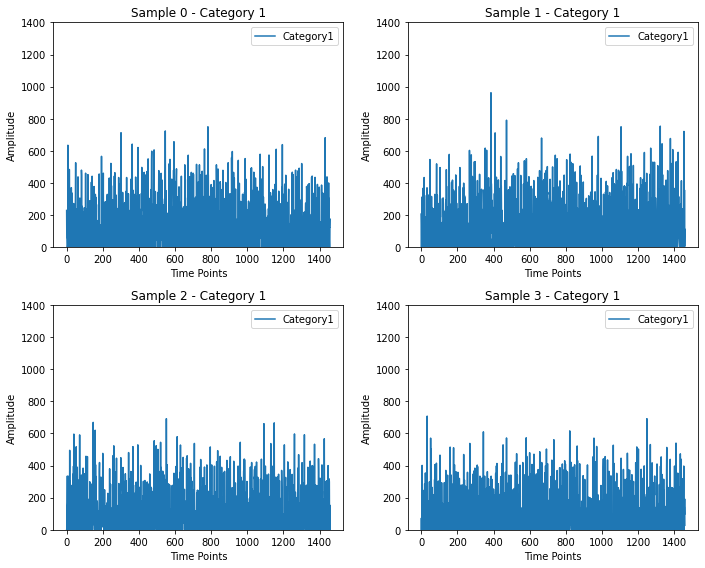

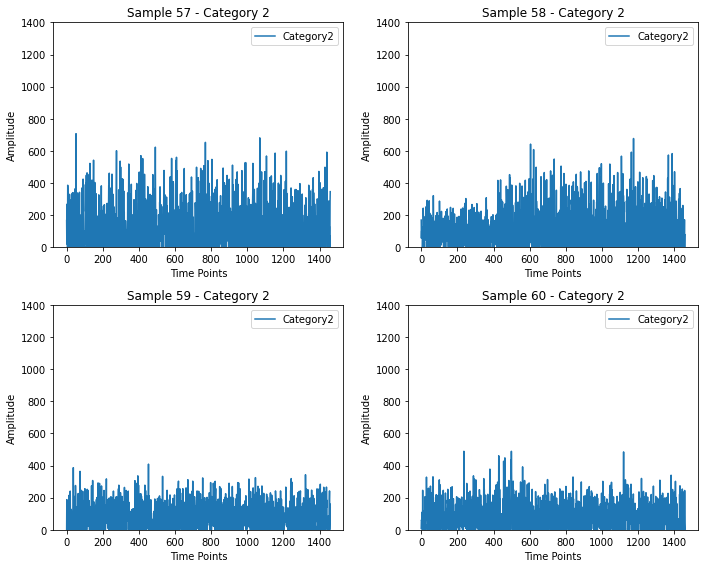

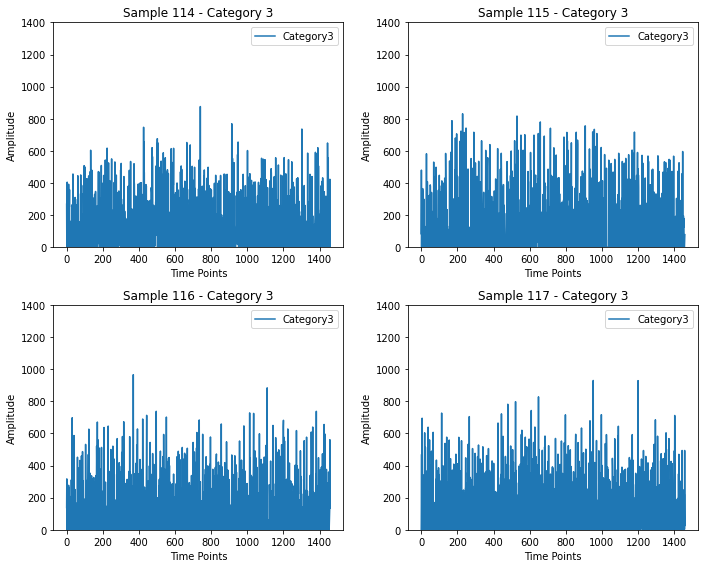

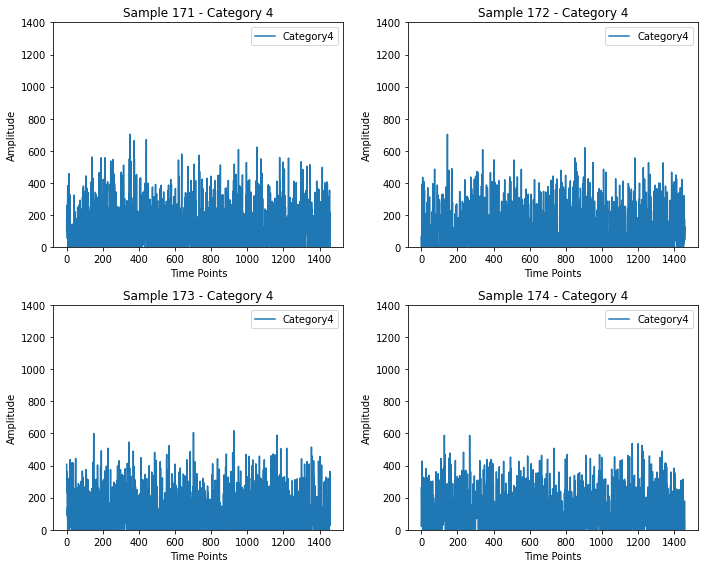

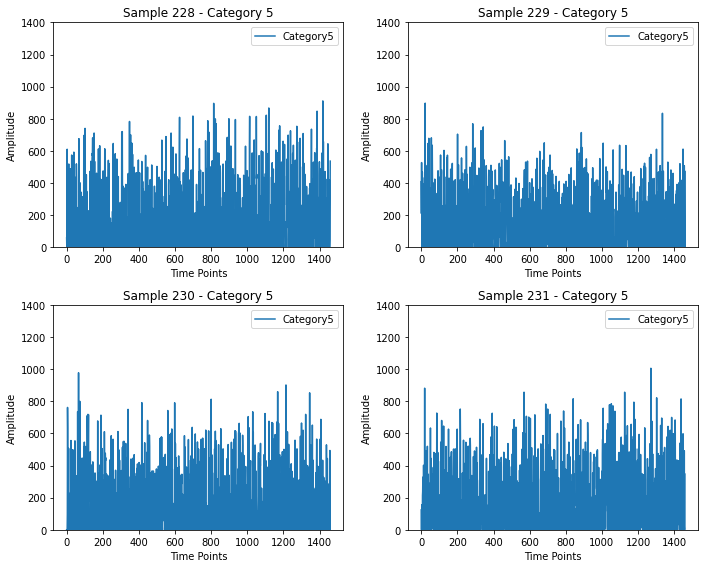

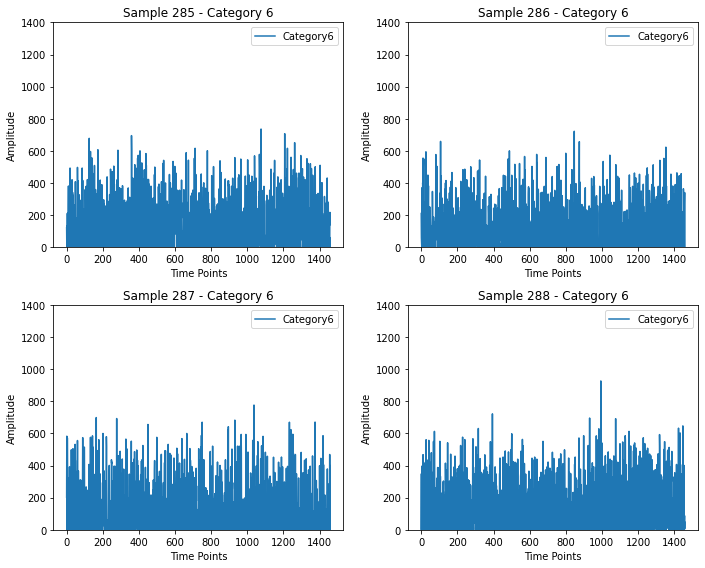

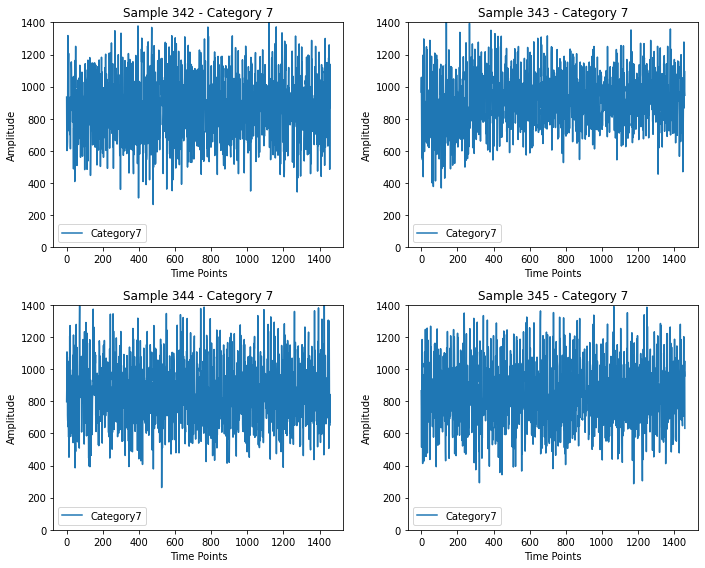

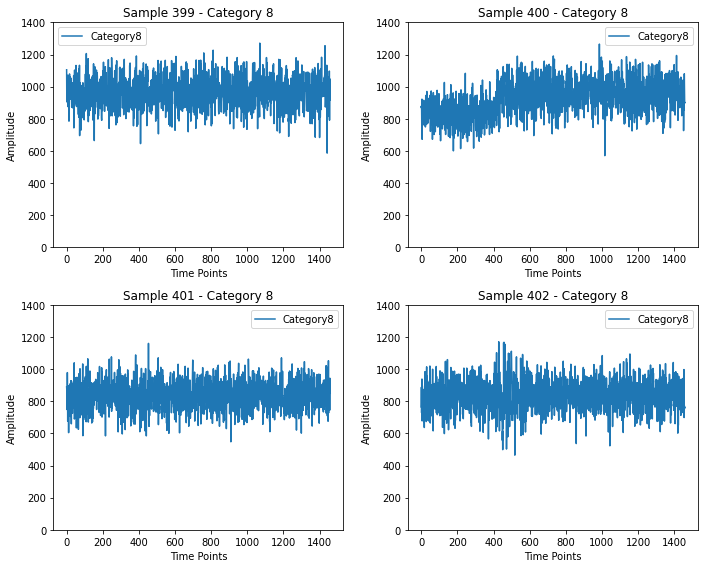

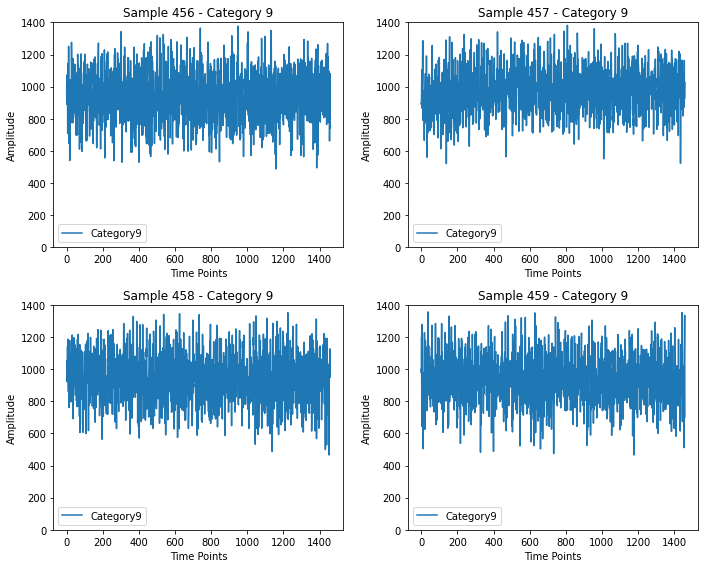

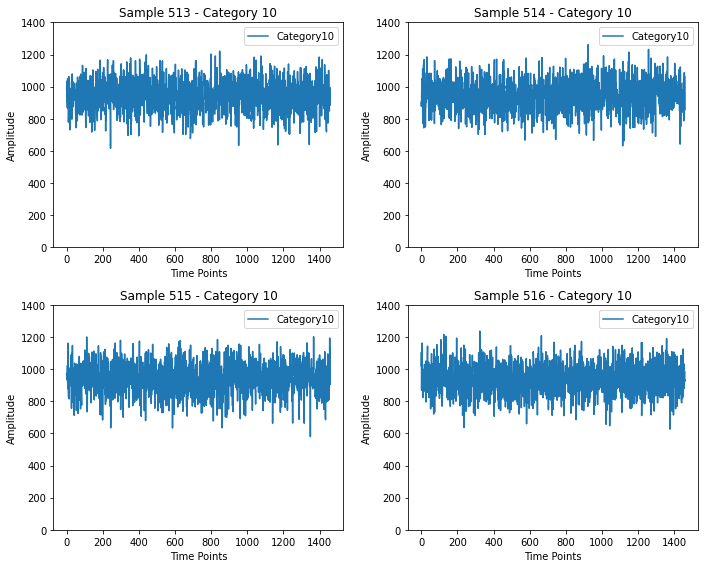

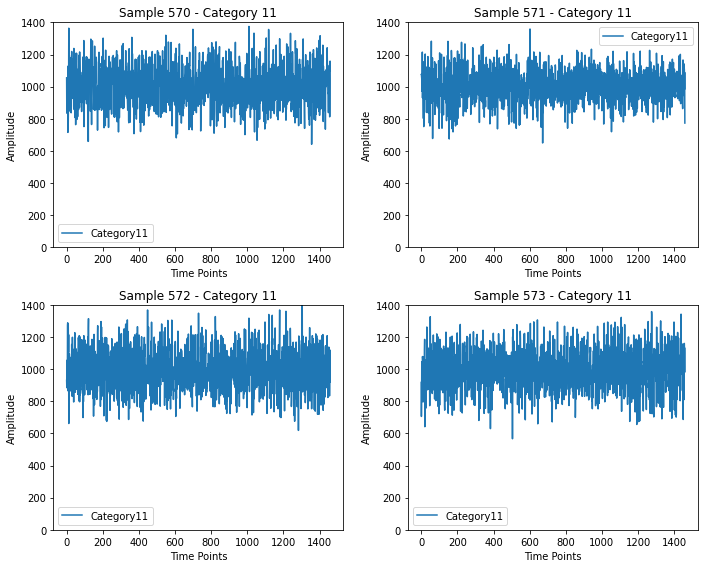

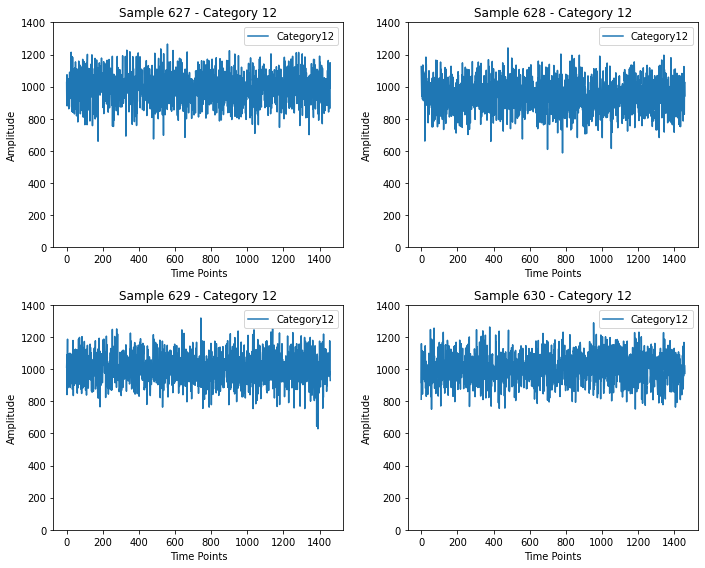

In [33]:
# create subplot for first 4 samples for each category
# create a for loop to loop through each category
for category in range (13):
    # get the index of the first 4 samples
    indices = df_label[df_label['Category'] == category].index[:4]

    # create subplot
    plt.figure(figsize=(10,8))

    # create subplot for the 4 samples
    for i, index in enumerate(indices,start=1):
        plt.subplot(2,2,i)
        plt.plot(df_raw.iloc[index],label=f'Category{category}')
        plt.title(f'Sample {index} - Category {category}')
        plt.ylim(0,1400)
        plt.xlabel('Time Points')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()


Result: Instead of comparing individual sample, will calculate the mean for each category and explore the relationship from the mean.

### 2. Comparison among categories - Plot the mean across the each category against time points

In [14]:
# Maybe we can plot the average across different category
# concatenate two dataframe for grouping of category
df_all = pd.concat([df_raw,df_label],axis=1)

# calculate mean for each category
df_mean = df_all.groupby('Category',as_index=True).mean()
df_mean.head()


,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Category,,,,,,,,,,,,,,,,,,,,,
1,130.561404,141.280702,140.280702,139.438596,148.263158,119.298246,70.192982,162.947368,119.982456,120.859649,...,107.315789,120.736842,137.684211,140.052632,131.982456,107.578947,123.228070,90.964912,142.421053,144.614035
2,89.947368,68.947368,68.491228,95.771930,93.368421,70.719298,86.561404,87.631579,99.684211,70.333333,...,75.280702,86.614035,87.649123,87.087719,79.736842,89.298246,92.736842,91.017544,87.526316,88.789474
3,185.052632,160.350877,125.859649,124.631579,170.578947,149.245614,97.561404,130.561404,184.824561,149.964912,...,125.157895,139.614035,139.473684,192.491228,129.105263,116.508772,166.280702,131.649123,113.596491,151.596491
4,117.105263,94.052632,136.070175,137.263158,129.947368,79.877193,115.842105,115.526316,109.894737,114.964912,...,107.614035,90.824561,131.736842,118.350877,121.596491,136.192982,125.140351,95.315789,148.298246,100.070175
5,146.631579,138.859649,119.561404,163.754386,172.298246,166.035088,169.684211,178.631579,152.947368,124.508772,...,184.929825,149.087719,177.526316,162.105263,162.315789,150.438596,140.666667,120.491228,160.122807,174.666667


In [15]:
# transform data
df_transposed = df_mean.T
df_transposed.head()

Category,1,2,3,4,5,6,7,8,9,10,11,12
0,130.561404,89.947368,185.052632,117.105263,146.631579,114.912281,910.807018,821.982456,965.789474,952.929825,974.929825,988.298246
1,141.280702,68.947368,160.350877,94.052632,138.859649,152.631579,882.964912,835.298246,929.789474,936.982456,981.614035,996.245614
2,140.280702,68.491228,125.859649,136.070175,119.561404,140.807018,868.736842,819.771930,910.000000,976.859649,956.403509,969.578947
3,139.438596,95.771930,124.631579,137.263158,163.754386,114.877193,885.578947,826.263158,937.912281,950.947368,1006.526316,985.929825
4,148.263158,93.368421,170.578947,129.947368,172.298246,120.859649,867.333333,834.982456,957.561404,946.122807,1007.824561,963.385965


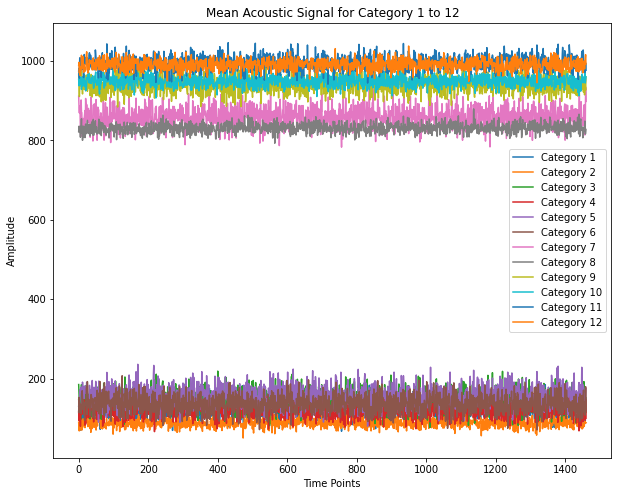

In [16]:
# plot mean acoustic signal
plt.figure(figsize = (10,8))

for cat in df_transposed.columns:
    plt.plot(df_transposed.index,df_transposed[cat],label=f'Category {cat}')
    
plt.title('Mean Acoustic Signal for Category 1 to 12')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Result: Signal from microphone 2 shows higher amplitude and the difference between different categories are better captured. Therefore, it will be chosen to perform further analysis.

### 3. Determine the difference between noisy and noiseless environment
- Hypothesis: Noisy environment will produce higher amplitude signal, with more noises.
- Method: Compare the signal data fro noisy and noiseless environment for the same pressure, collected by microphone 2.

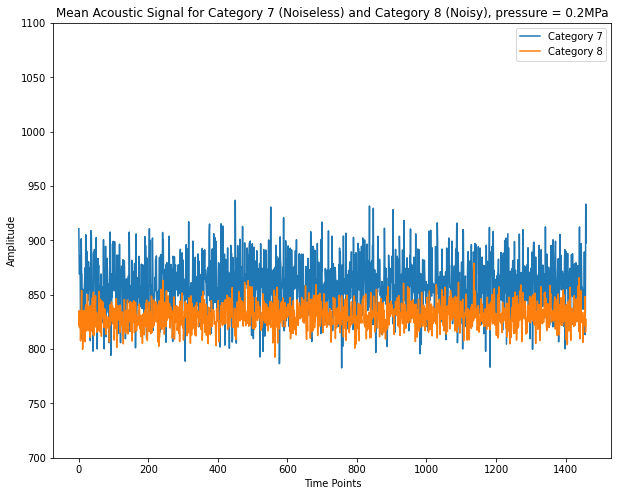

In [62]:
# Cat 1 and 2
# plot mean acoustic signal
plt.figure(figsize = (10,8))

for cat in range(7,9):
    plt.plot(df_transposed.index,df_transposed[cat],label=f"Category {cat}")
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'Mean Acoustic Signal for Category 7 (Noiseless) and Category 8 (Noisy), pressure = 0.2MPa')
plt.ylim(700,1100)

plt.show()

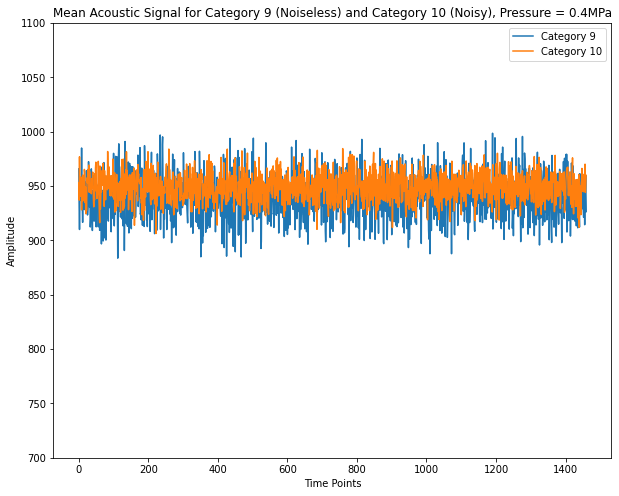

In [56]:
# Cat 3 and 4
# plot mean acoustic signal
plt.figure(figsize = (10,8))

for cat in range(9,11):
    plt.plot(df_transposed.index,df_transposed[cat],label=f"Category {cat}")
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'Mean Acoustic Signal for Category 9 (Noiseless) and Category 10 (Noisy), Pressure = 0.4MPa')
plt.ylim(700,1100)

plt.show()

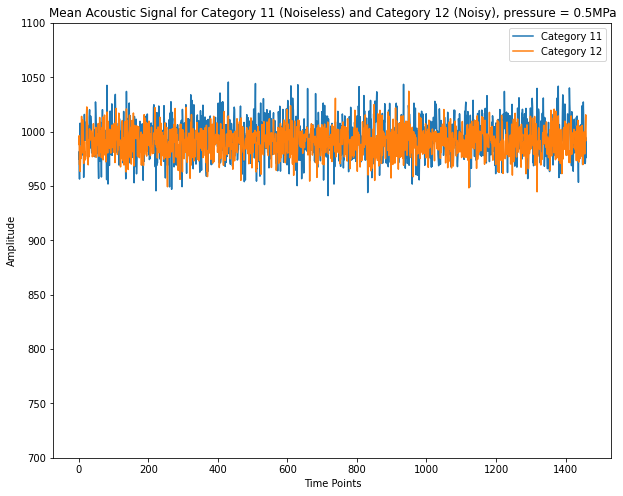

In [63]:
# Cat 1 and 2
# plot mean acoustic signal
plt.figure(figsize = (10,8))

for cat in range(11,13):
    plt.plot(df_transposed.index,df_transposed[cat],label=f"Category {cat}")
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'Mean Acoustic Signal for Category 11 (Noiseless) and Category 12 (Noisy), pressure = 0.5MPa')
plt.ylim(700,1100)

plt.show()

Result: The difference between noiseless and noisy environment is more obvious in the lower pressure range. However, when the pressure increases, the difference between the two reduces.

### 4. Determine the relationship between pressure and amplitude
- Hypothesis: Higher pressure flow will produce higher amplitude acoustic signal.
- Method: compare signal data for different pressure, under noiseless environment, collected by microphone 1.


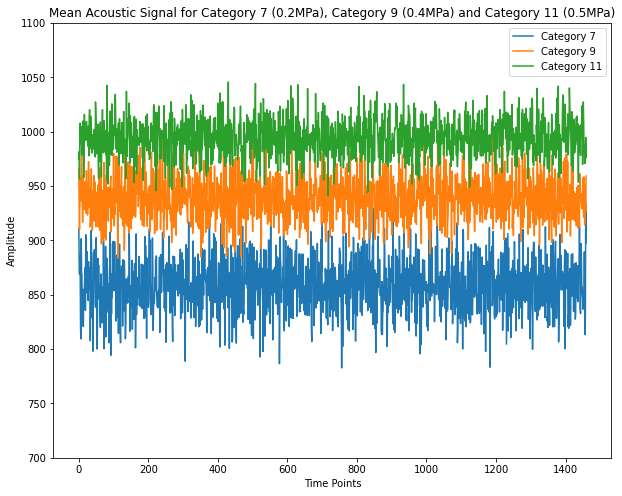

In [64]:
plt.figure(figsize = (10,8))

# cat_1 = 0.2 MPa under noiseless environment
# cat_2 = 0.2 MPa under noisy environment
for cat in range(7,12,2):
    plt.plot(df_transposed.index,df_transposed[cat],label=f"Category {cat}")
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'Mean Acoustic Signal for Category 7 (0.2MPa), Category 9 (0.4MPa) and Category 11 (0.5MPa)')
plt.ylim(700,1100)

plt.show()

Result: The hypothesis is correct. Higher pressure will indeed produce higher amplitude acoustic signal.

### 5. Perform FFT to transform to frequency space

In [ ]:
# test for category 1
fft_result = np.fft.fft(df_transposed[1])
frequency = np.fft.fftfreq()